**Big Data Lab 6**
- Supervised learning Algorithms
- Decision tree

**Decision Tree belongs to the class of supervised learning algorithms**
-  It uses a tree like structure

![](https://drive.google.com/uc?export=view&id=11z3QejtB30fV3zww7pGpJCayroPl2Wpd)

![](https://drive.google.com/uc?export=view&id=1Ic2mzvrLTlA-qx5Rs20lbiRg61pLtdxk)

#Read Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
df = pd.read_csv('/content/cars_dataset.csv')

In [ ]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


**Visualize class column Distribution**

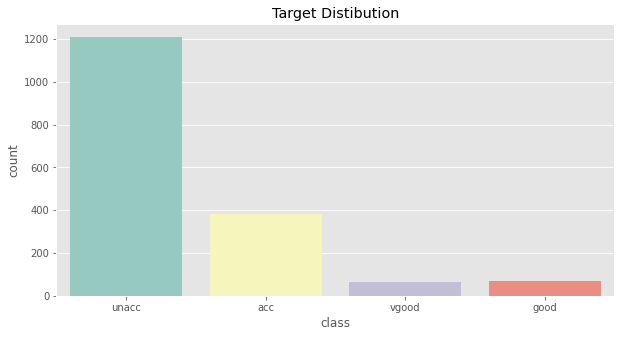

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='class',palette="Set3").set(title="Target Distibution");

**Split Data into Features and Target**

In [ ]:
X = df.drop(['class'], axis=1)

y = df['class']

#**Encode Features**

In [ ]:
X

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [ ]:
X['maint'].value_counts()

vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64

**Using map Method**

In [ ]:
X['maint'].map({'vhigh':1,'high':2,'med':3,'low':4}).value_counts()

1    432
2    432
3    432
4    432
Name: maint, dtype: int64

**Using category_encoders library**

In [ ]:
!pip install category_encoders

In [ ]:
import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X = encoder.fit_transform(X)

In [ ]:
X

,buying,maint,doors,persons,lug_boot,safety
0,1,1,1,1,1,1
1,1,1,1,1,1,2
2,1,1,1,1,1,3
3,1,1,1,1,2,1
4,1,1,1,1,2,2
...,...,...,...,...,...,...
1723,4,4,4,3,2,2
1724,4,4,4,3,2,3
1725,4,4,4,3,3,1
1726,4,4,4,3,3,2


#Split our Dataset into Train, Test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=4)
# fit the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
y_pred= clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print('Model accuracy score =',acc*100)

Model accuracy score = 85.28896672504378


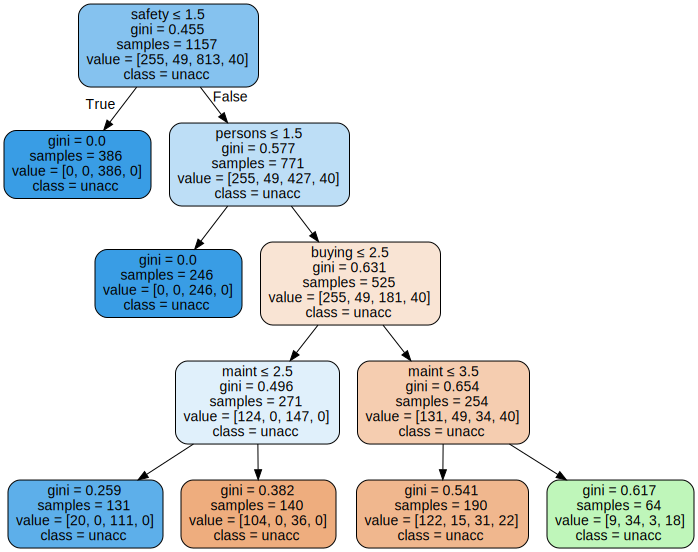

In [ ]:
import graphviz 
from sklearn import tree

dot_data = tree.export_graphviz(clf,feature_names=X_train.columns,class_names=y_train,rounded=True, filled=True
                                ,special_characters=True)

graph = graphviz.Source(dot_data) 
graph 

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

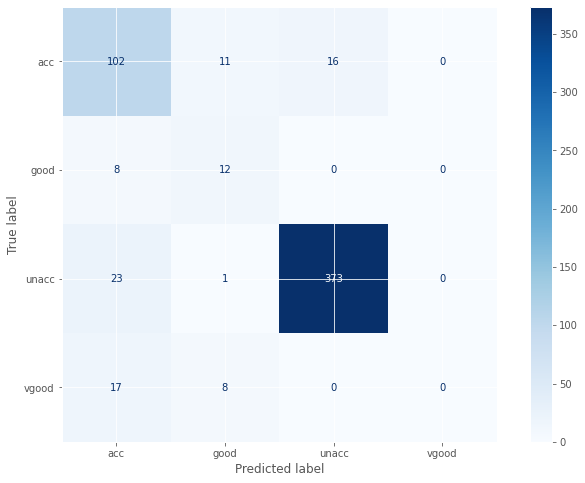

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,8
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues);

#Lab Task
1. Increase and decrease the depth of the tree and observe + describe 
what happens to the accuracy, confusion matrix

2. What is the difference between **decision tree** and **random forest** algorithms

3. Is accuracy a good metric to measure the performance of imbalanced data and why